In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
step2 = pd.read_csv('../data/out/step2.csv')
print(f"Number of columns in step2: {len(step2.columns)}")
print(f"Columns in step2: {step2.columns}")

Number of columns in step2: 36586
Columns in step2: Index(['Document', ''1408'[]', 'is[]', 'the[]', 'latest[]', 'hodge[]',
       'podge[]', 'of[]', 'cheap[]', 'scare[]',
       ...
       'dedicates[]', 'slaves[]', 'sorceries[]', 'fervor[]', 'Xica[]', 'URL',
       'Text', 'Sentiment', 'Text length', 'ReviewID'],
      dtype='object', length=36586)


In [4]:
# Drop label and non-numeric columns
X = step2.drop(columns=['Sentiment', 'Document', 'Text', 'URL', 'ReviewID'], errors='ignore')

# Keep only numeric columns
X = X.select_dtypes(include=['number'])

# Define target variable
y = step2['Sentiment']

# Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Fit the model on the training data
nbmodel = MultinomialNB(alpha=1.0)
nbmodel.fit(X_train, y_train)

# Predict on the test data
y_pred = nbmodel.predict(X_test)

Training Accuracy: 0.5267

Classification Report:
               precision    recall  f1-score   support

         NEG       0.53      0.41      0.46       300
         POS       0.52      0.64      0.58       300

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.52       600
weighted avg       0.53      0.53      0.52       600



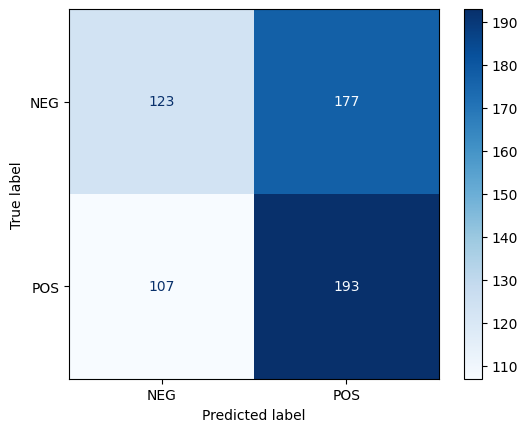

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualize it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nbmodel.classes_)
disp.plot(cmap='Blues')  # You can also use 'viridis', 'Greens', etc.

In [6]:
imdb = pd.read_csv('./data/in/imdb.csv', encoding='latin-1')
imdb.columns

Index(['Index', 'URL', 'Text', 'Sentiment'], dtype='object')

In [7]:
reviews_for_genai = pd.read_csv("./data/out/reviews_for_genai.csv")
reviews_for_genai['Sentiment'].unique()
reviews_for_genai.columns

Index(['URL', 'Text', 'Sentiment', 'Text length'], dtype='object')

In [8]:
imdb = pd.read_csv('./data/in/imdb.csv')
print(f"Total records in IMDB dataset: {len(imdb)}")
print(f"Unique Index values in IMDB dataset: {imdb['Index'].nunique()}")
print(f"Number of duplicate Index values: {len(imdb) - imdb['Index'].nunique()}")

# How many duplicates are there along with frequency
duplicate_counts = imdb[imdb.duplicated(subset=['Index'], keep=False)].groupby('Index').size()
print(f"Duplicate Indices with their frequencies:\n{duplicate_counts}")

# Display only if frequency > 2
duplicates_more_than_two = duplicate_counts[duplicate_counts > 2]
print(f"Indices with more than 2 duplicates:\n----{duplicates_more_than_two}")

Total records in IMDB dataset: 2000
Unique Index values in IMDB dataset: 1912
Number of duplicate Index values: 88
Duplicate Indices with their frequencies:
Index
313      2
481      2
666      2
1144     2
1154     2
        ..
11550    2
12286    2
12330    2
12331    2
12401    2
Length: 88, dtype: int64
Indices with more than 2 duplicates:
----Series([], dtype: int64)


In [9]:
# Establish that each duplicate has one positive ('POS') and one negative ('NEG') review and flag exceptions in a new column in the CSV file
def check_sentiment_balance_series(sentiments):
    unique = set(sentiments)
    if unique == {'POS', 'NEG'}:
        return 'Follows Pattern'
    else:
        return 'Exception'

imdb_duplicates = imdb[imdb.duplicated(subset=['Index'], keep=False)].sort_values(by='Index')

# Compute balance per Index using the Sentiment column only and map results back to each row.
# This avoids the deprecated behavior of DataFrameGroupBy.apply operating on grouping columns.
sentiment_balance = imdb_duplicates.groupby('Index')['Sentiment'].apply(check_sentiment_balance_series)
imdb_duplicates['Sentiment_Balance'] = imdb_duplicates['Index'].map(sentiment_balance)

# Add a column to the CSV file indicating whether movies referred in each duplicate pair are the same or different
def check_movie_title_balance_series(titles):
    unique = set(titles)
    if len(unique) == 1:
        return 'Same Movie'
    else:
        return 'Different Movies'
movie_title_balance = imdb_duplicates.groupby('Index')['URL'].apply(check_movie_title_balance_series)
imdb_duplicates['Movie_Title_Balance'] = imdb_duplicates['Index'].map(movie_title_balance)
imdb_duplicates.to_csv('./data/out/imdb_duplicates_with_balance_check_and_movie_title_check.csv', index=False)

In [10]:
print(f"Total movies in duplicates file: {len(imdb)}")
print(f"Unique URL values in duplicates file: {imdb['URL'].nunique()}")
print(f"Number of duplicate URL values in duplicates file: {len(imdb) - imdb['URL'].nunique()}")
print(f"Unique URLs with duplicates: {len(imdb[imdb.duplicated(subset=['URL'], keep=False)].groupby('URL').size())}")
print(f"Movies have only a single review: {len(imdb[~imdb.duplicated(subset=['URL'], keep=False)])}")

Total movies in duplicates file: 2000
Unique URL values in duplicates file: 1247
Number of duplicate URL values in duplicates file: 753
Unique URLs with duplicates: 472
Movies have only a single review: 775


In [11]:
imdb[imdb.duplicated(subset=['URL'], keep=False)].groupby('URL').size().to_csv('./data/out/imdb_url_duplicates_with_counts.csv')

In [12]:
reviews_for_genai = pd.read_csv("./data/out/reviews_for_genai.csv")
reviews_for_genai.columns

Index(['URL', 'Text', 'Sentiment', 'Text length'], dtype='object')

In [2]:
step2 = pd.read_csv('./data/out/step2.csv')
print(f"Number of columns in step2: {len(step2.columns)}")

# Print non-numeric columns
non_numeric_cols = step2.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns in step2: {list(non_numeric_cols)}")

Number of columns in step2: 21835
Non-numeric columns in step2: ['Document', 'URL', 'Text', 'Sentiment', 'ReviewID']


In [ ]:
# Identify columns with missing values
print(f"Columns with missing values in step2: {step2.columns[step2.isnull().any()].tolist()}")

Columns with missing values in step2: []
